In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import configparser

In [4]:
params = {}
config = configparser.ConfigParser()
config.read("../experiments/test_mv2_cpm.cfg")
for _ in config.options("Train"):
    params[_] = eval(config.get("Train", _))

In [5]:
import dataset

W0622 00:15:03.715875 139889609656064 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/tensorpack/utils/naming.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0622 00:15:03.724330 139889609656064 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/tensorpack/tfutils/common.py:142: The name tf.VERSION is deprecated. Please use tf.version.VERSION instead.

W0622 00:15:03.725168 139889609656064 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/tensorpack/models/utils.py:62: The name tf.layers.Dense is deprecated. Please use tf.compat.v1.layers.Dense instead.

W0622 00:15:03.734884 139889609656064 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/tensorpack/callbacks/hooks.py:15: The name tf.train.SessionRunHook is deprecated. Please use tf.estimator.SessionRunHook instead.

W0

In [6]:
from dataset import get_train_dataset_pipeline, get_valid_dataset_pipeline

In [7]:
dataset.set_config(params)

In [8]:
input_pipeline = get_train_dataset_pipeline(batch_size=16, epoch=10, buffer_size=100)

preparing annotation from: /home/ubuntu/sandbox/ai_challenger/ai_challenger_train.json
loading annotations into memory...


W0622 00:15:17.199317 139889609656064 deprecation.py:323] From /home/ubuntu/landing/PoseEstimationForMobile/training/src/dataset.py:96: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


Done (t=0.38s)
creating index...
index created!


In [9]:
iter = input_pipeline.make_one_shot_iterator()

W0622 00:15:17.287945 139889609656064 deprecation.py:323] From <ipython-input-9-4048c04a40c6>:1: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [49]:
from pycocotools.coco import COCO
coco = COCO("/home/ubuntu/mscoco/annotations/person_keypoints_val2017.json")

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


In [11]:
from pycocotools.coco import COCO
coco = COCO("/home/ubuntu/sandbox/ai_challenger/ai_challenger_train.json")

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [12]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
human



In [13]:
import numpy as np
catIds = coco.getCatIds(catNms=['human']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds);
imgIds
imgIds = coco.getImgIds(imgIds = [3, 4])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[1]


In [14]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [15]:
img

{'file_name': 'ai_challenger/train/44986b7d42061c0719b98b98b01c50385ee52cb8.jpg',
 'height': 701,
 'width': 500,
 'id': 3}

In [16]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

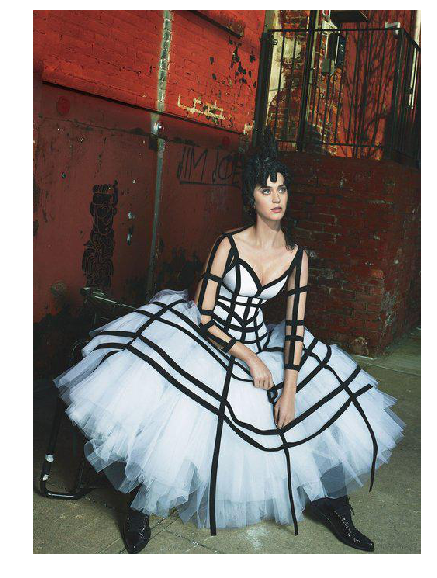

In [17]:
I = io.imread("/home/ubuntu/sandbox/" + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

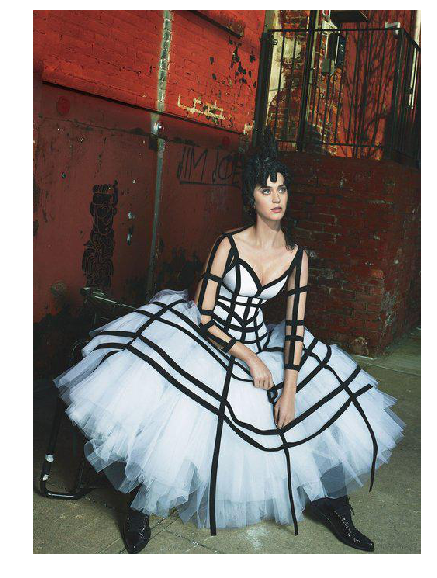

In [19]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [30]:
anns[0]["keypoints"]

[305,
 203,
 2,
 304,
 292,
 2,
 344,
 314,
 2,
 243,
 295,
 2,
 337,
 416,
 2,
 218,
 395,
 2,
 328,
 490,
 2,
 280,
 448,
 2,
 299,
 435,
 2,
 253,
 427,
 1,
 370,
 529,
 2,
 201,
 530,
 2,
 381,
 614,
 2,
 142,
 622,
 2]

In [39]:
anns

[{'num_keypoints': 13,
  'area': 256220,
  'keypoints': [305,
   203,
   2,
   304,
   292,
   2,
   344,
   314,
   2,
   243,
   295,
   2,
   337,
   416,
   2,
   218,
   395,
   2,
   328,
   490,
   2,
   280,
   448,
   2,
   299,
   435,
   2,
   253,
   427,
   1,
   370,
   529,
   2,
   201,
   530,
   2,
   381,
   614,
   2,
   142,
   622,
   2],
  'bbox': [21, 141, 460, 557],
  'image_id': 3,
  'category_id': 1,
  'id': 0}]

IndexError: index 13 is out of bounds for axis 0 with size 13

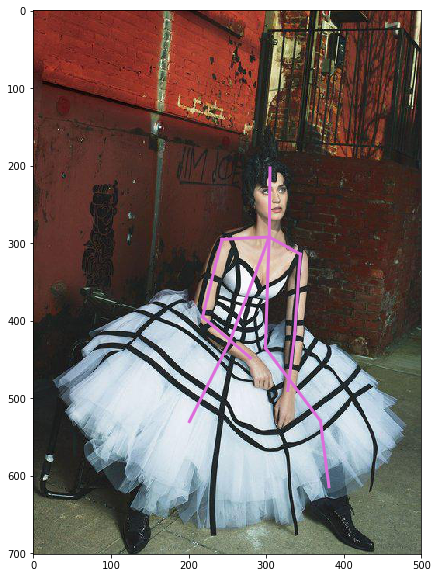

In [45]:
anns = [{'num_keypoints': 13
    ,
  'area': 256220,
  'keypoints': [305,
   203,
   2,
   304,
   292,
   2,
   344,
   314,
   2,
   243,
   295,
   2,
   337,
   416,
   2,
   218,
   395,
   2,
   328,
   490,
   2,
   280,
   448,
   2,
   299,
   435,
   2,
   253,
   427,
   1,
   370,
   529,
   2,
   201,
   530,
   2,
   381,
   614,
   2,
   142,
   622,
   2],
  'bbox': [21, 141, 460, 557],
  'image_id': 3,
  'category_id': 1,
  'id': 0}]
plt.imshow(I); plt.axis('on')
coco.showAnns(anns)

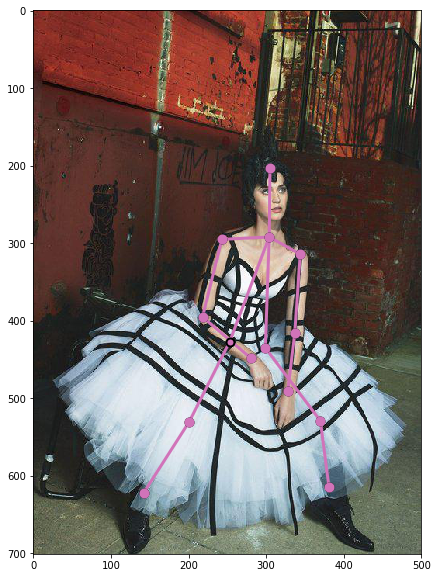

In [38]:
plt.imshow(I); plt.axis('on')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [ ]:
coco.info()


# In[5]:

# get IDs of all images in the annotation file
im_id_list = coco.getImageIds()
print 'The validation split contains %d images'%(len(im_id_list))
print 'the first 3 image IDs are'
print im_id_list[0:3]


# In[6]:

# get IDs of images that have people
im_id_list = coco.getImageIds({'cat_id':1})
print '%d images have people'%(len(im_id_list))


# In[7]:

# read annotations in first 3 images
anns = coco.loadAnnotations(params={'im_id_list': im_id_list[0:1]})
print 'This image contains %d instances'%(len(anns))
# visualize the annotations
coco.showAnns(anns)


# In[17]:

# get IDs of all images in the annotation file
anns = coco.loadAnnotations(params={'im_id_list': im_id_list[0:1], 'cat_id': 1})
print '%d of them are people'%(len(anns))
# visualize the annotations that are people
print 'visualize image %d:'%(im_id_list[0])
coco.showAnns(anns)
# visualize the annotations that are people and area is less than 100*100
print 'get instances that are smaller than 100*100'
anns = coco.loadAnnotations(params={'im_id_list': im_id_list[0:1], 'cat_id': 1, 'area__lt':100*100})
coco.showAnns(anns)
# visualize the annotations that are people and area is greater than 100*100
print 'get instances that are greater than 100*100'
anns = coco.loadAnnotations(params={'im_id_list': im_id_list[0:1], 'cat_id': 1, 'area__gt':100*100})
coco.showAnns(anns)


# In[9]:

# load sentences annotations and print out data
annotation_file = 'annotations/sentences_val2014.json'
image_folder = './images'


# In[10]:

# initializing coco sentence object to read, search, and visualize COCO dataset
coco_sentences= COCO(annotation_file=annotation_file, image_folder=image_folder)


# In[11]:

# get IDs of all sentences in the annotation file
anns = coco_sentences.loadAnnotations()
print 'The validation split has %d sentence annotations'%(len(anns))


# In[12]:

# get IDs of all sentences by images
anns = coco_sentences.loadAnnotations({'im_id_list': [458755]})
#print 'show sentences'
coco_sentences.showAnns(anns)


In [48]:
"""Prepare MS COCO datasets"""
import os
import shutil
import argparse
import zipfile
from gluoncv.utils import download, makedirs
from gluoncv.data.mscoco.utils import try_import_pycocotools

_TARGET_DIR = os.path.expanduser('~/sandbox/datasets/coco')

def parse_args():
    parser = argparse.ArgumentParser(
        description='Initialize MS COCO dataset.',
        epilog='Example: python mscoco.py --download-dir ~/mscoco',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('--download-dir', type=str, default='~/mscoco/', help='dataset directory on disk')
    parser.add_argument('--no-download', action='store_true', help='disable automatic download if set')
    parser.add_argument('--overwrite', action='store_true', help='overwrite downloaded files if set, in case they are corrupted')
    args = parser.parse_args()
    return args

def download_coco(path, overwrite=False):
    _DOWNLOAD_URLS = [
        ('http://images.cocodataset.org/zips/train2017.zip',
         '10ad623668ab00c62c096f0ed636d6aff41faca5'),
        ('http://images.cocodataset.org/annotations/annotations_trainval2017.zip',
         '8551ee4bb5860311e79dace7e79cb91e432e78b3'),
        ('http://images.cocodataset.org/zips/val2017.zip',
         '4950dc9d00dbe1c933ee0170f5797584351d2a41'),
        # ('http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip',
         # '46cdcf715b6b4f67e980b529534e79c2edffe084'),
        # test2017.zip, for those who want to attend the competition.
        # ('http://images.cocodataset.org/zips/test2017.zip',
        #  '4e443f8a2eca6b1dac8a6c57641b67dd40621a49'),
    ]
    makedirs(path)
    for url, checksum in _DOWNLOAD_URLS:
        filename = download(url, path=path, overwrite=overwrite, sha1_hash=checksum)
        # extract
        with zipfile.ZipFile(filename) as zf:
            zf.extractall(path=path)

if __name__ == '__main__':
    args = parse_args()
    path = os.path.expanduser(args.download_dir)
    if not os.path.isdir(path) or not os.path.isdir(os.path.join(path, 'train2017')) \
        or not os.path.isdir(os.path.join(path, 'val2017')) \
        or not os.path.isdir(os.path.join(path, 'annotations')):
        if args.no_download:
            raise ValueError(('{} is not a valid directory, make sure it is present.'
                              ' Or you should not disable "--no-download" to grab it'.format(path)))
        else:
            download_coco(path, overwrite=args.overwrite)

    # make symlink
    makedirs(os.path.expanduser('~/sandbox/datasets/coco'))
    if os.path.isdir(_TARGET_DIR):
        os.remove(_TARGET_DIR)
    os.symlink(path, _TARGET_DIR)
    try_import_pycocotools()

[autoreload of numpy failed: Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/numpy/__init__.py", line 151, in <module>
    from .testing import Tester, _

usage: __main__.py [-h] [--download-dir DOWNLOAD_DIR] [--no-download]
                   [--overwrite]
__main__.py: error: unrecognized arguments: -f /run/user/1000/jupyter/kernel-7e8e7edd-c724-4349-907d-f27dc7b5cabd.json


SystemExit: 2

/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
